In [ ]:
#1)UNIVARIATE ANALYSIS
#Univariate analysis is a statistical method used in data analysis to examine and describe the characteristics of a single 
#variable or data set. It is primarily concerned with analyzing the distribution, central tendency, and variability of one 
#variable at a time, without considering relationships or interactions with other variables.

#Continuous Variables:
#For our dataset, we took the continuous variables that include columns like price, distance, and various weather-related columns
#such as temperature, humidity, and windSpeed, among others.

#We also focused on a subset of these continuous variables for clarity. We'll choose:
#1)price, 2)distance, 3)temperature & 4)humidity 

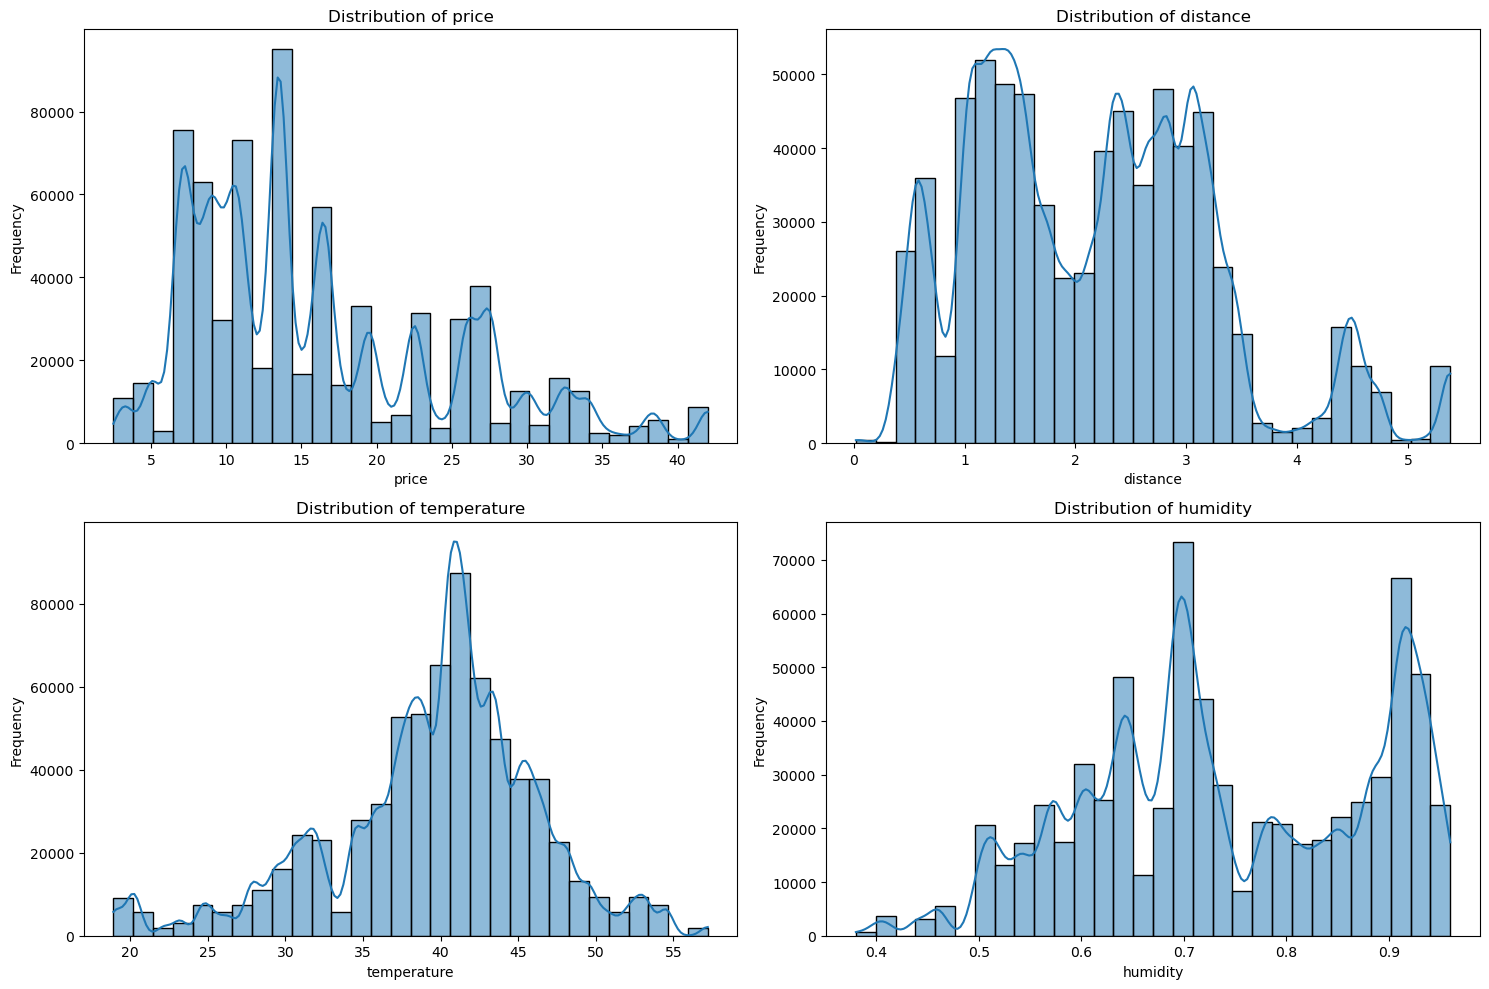

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
data = pd.read_csv('/Users/nbale/Desktop/5260 Business Process Analytics/Data Cleaning/cleaned_rideshare_data1.csv')

#1.1)Continuous variables to visualize
continuous_subset = ['price', 'distance', 'temperature', 'humidity']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

for i, col in enumerate(continuous_subset, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
#Inference from Distributions for the selected continuous variables:

#1)Price: The distribution of ride prices appears to be right-skewed, with most rides priced below $20, and a few priced much higher.
#2)Distance: Ride distances also seem to be right-skewed, with most rides being short in distance, and very few long-distance rides.
#3)Temperature: The temperature distribution seems to be relatively normal, with most rides occurring in moderate temperatures.
#4)Humidity: There's a notable peak at higher humidity levels, indicating that many rides occur when the humidity is relatively high.

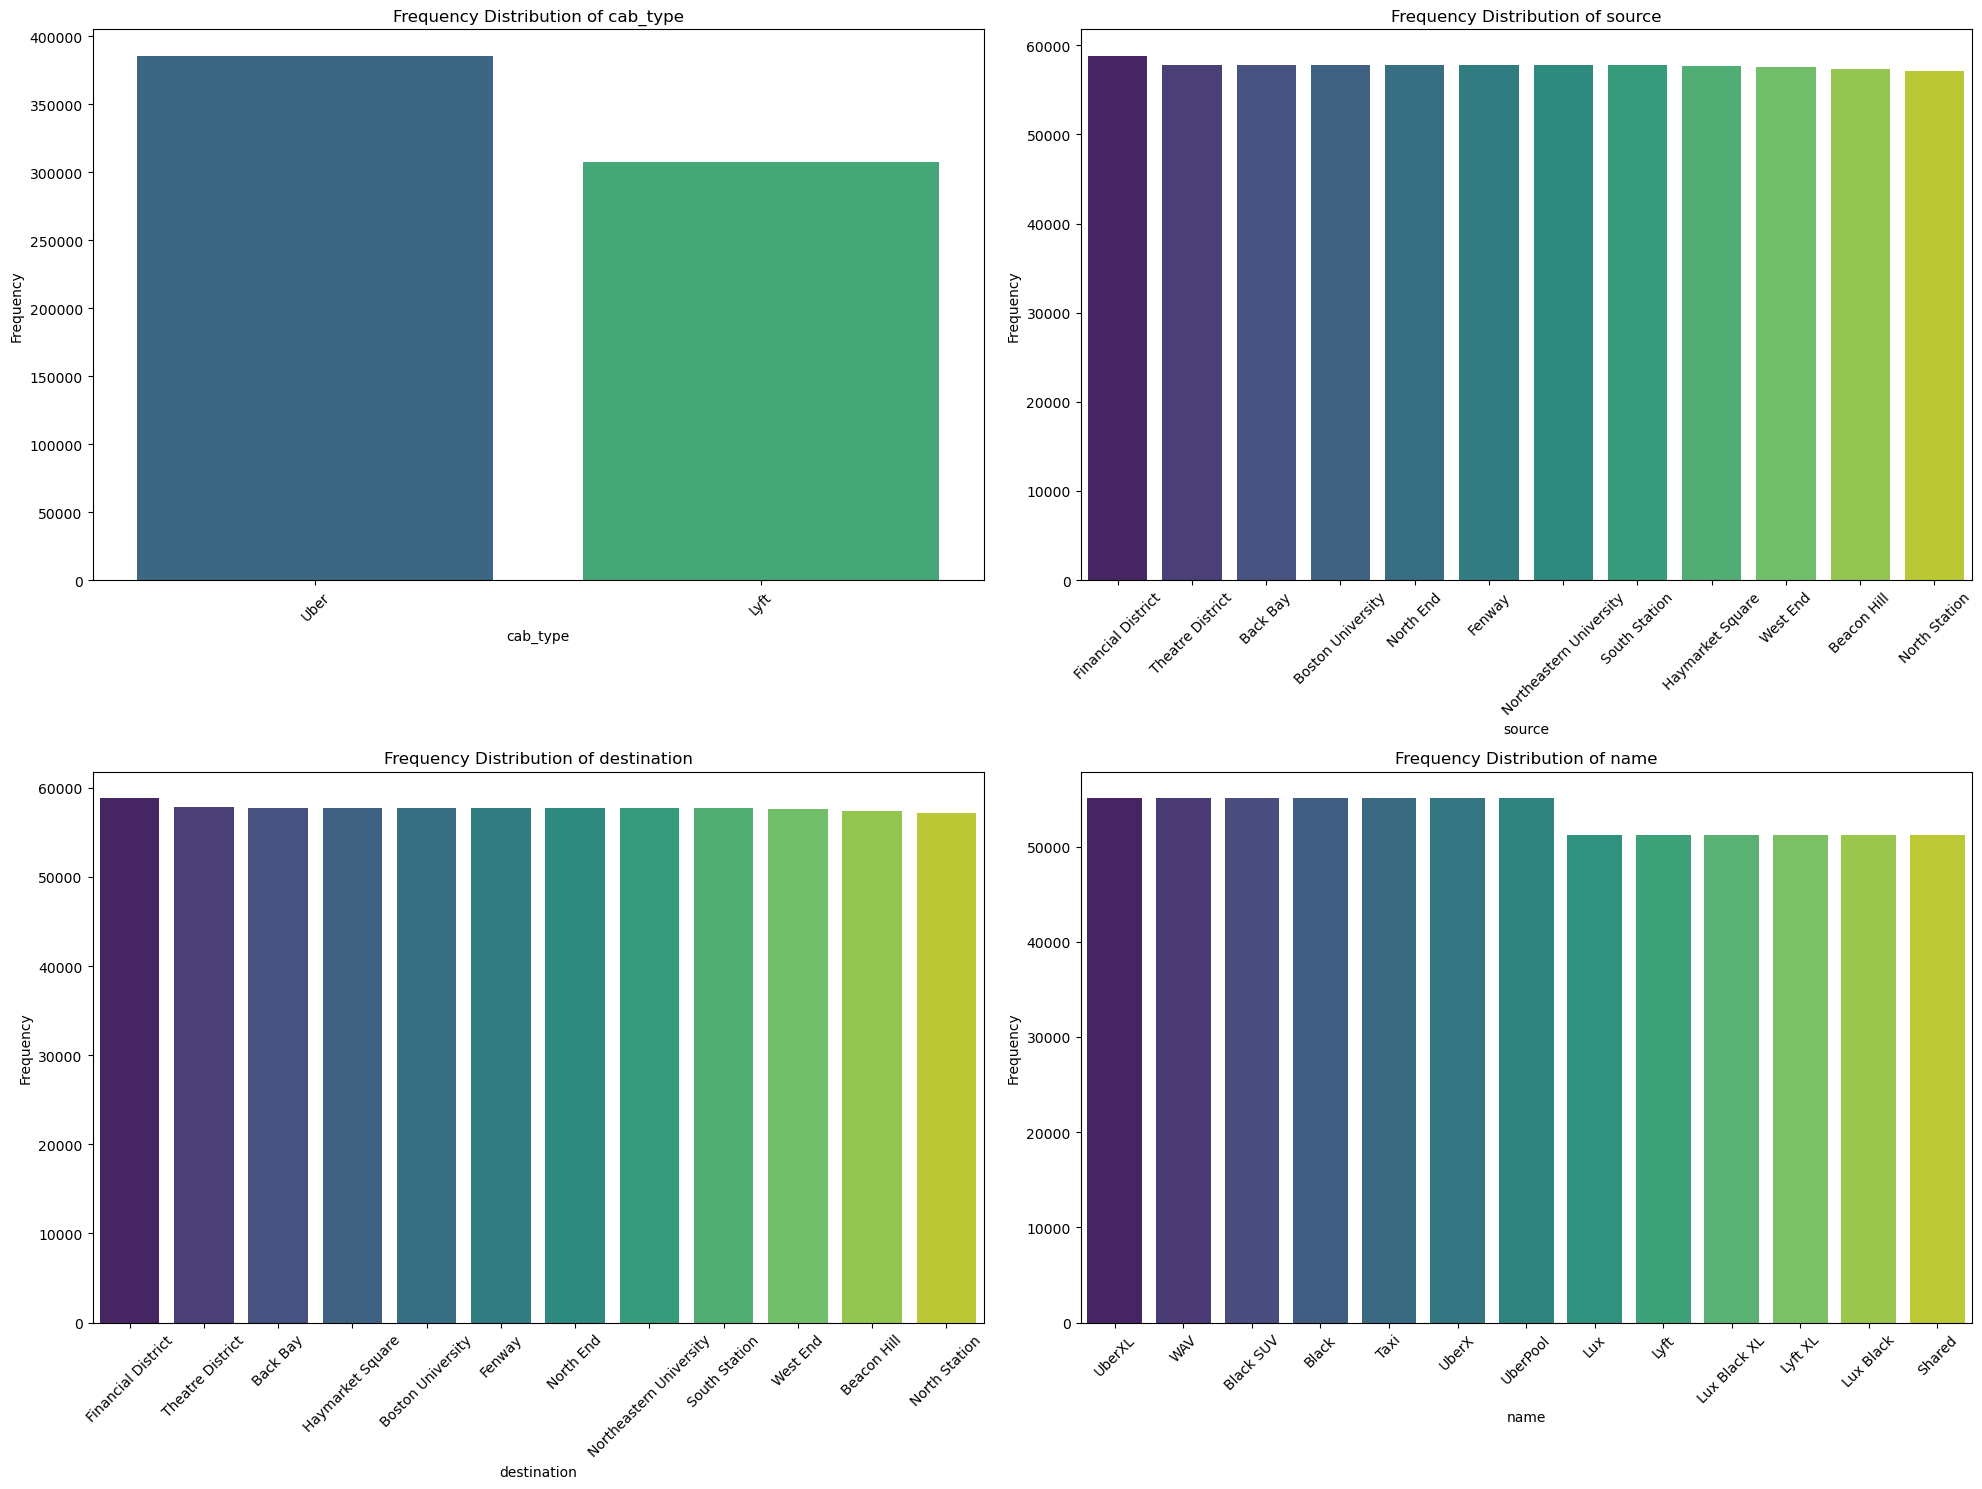

In [4]:
#1.2)Next, we made Bar plots for the chosen categorical variables with categories on the x-axis

# Setting up the matplotlib figure
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_subset, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")
    plt.title(f'Frequency Distribution of {col}')
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
#Inference from Barplots

#Cab Type: The distribution between Uber and Lyft shows the no. of rides in Uber are more than Lyft
#Source: The frequency of different starting locations is displayed, with "Financial District" being the most popular.
#Destination: The frequency of different ending locations is shown which looks similar to Source distribution.
#Ride Type (Name): Different categories of rides are presented with their respective frequencies. 

In [ ]:
#2)BIVARIATE ANALYSIS : Bivariate analysis examines the relationship between two variables to determine if there is
#an association or correlation between them using scatter plots, box plots etc

#We used Scatter plots (Continuous vs. Continuous): visualize relationships between two continuous variables, 
#we chose a few pairs and focused on the relationships between 
#price vs. distance
#temperature vs. humidity
#price vs. temperature

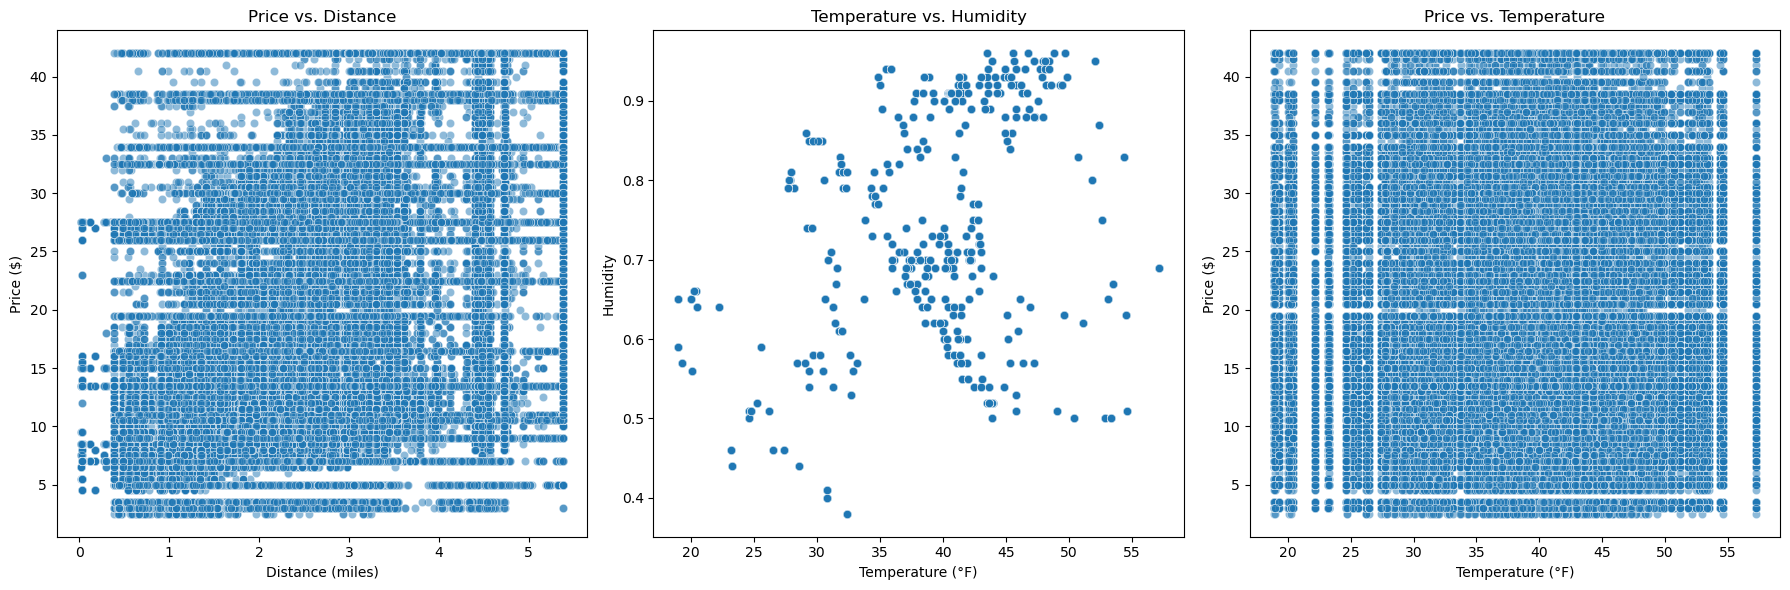

In [11]:
#2.1)Setting up the figure and axes

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting area
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Scatter plot for price vs. distance
sns.scatterplot(x='distance', y='price', data=data, ax=axes[0], alpha=0.5)
axes[0].set_title('Price vs. Distance')
axes[0].set_xlabel('Distance (miles)')
axes[0].set_ylabel('Price ($)')

# Scatter plot for temperature vs. humidity
sns.scatterplot(x='temperature', y='humidity', data=data, ax=axes[1], alpha=0.5)
axes[1].set_title('Temperature vs. Humidity')
axes[1].set_xlabel('Temperature (°F)')
axes[1].set_ylabel('Humidity')

# Scatter plot for price vs. temperature
sns.scatterplot(x='temperature', y='price', data=data, ax=axes[2], alpha=0.5)
axes[2].set_title('Price vs. Temperature')
axes[2].set_xlabel('Temperature (°F)')
axes[2].set_ylabel('Price ($)')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
#We got the following Inference from the Scatterplots

#1)Price vs. Distance: As distance increases, the price also seems to increase. 
#This suggests a positive correlation between the distance of the ride and its price.

#2)Temperature vs. Humidity: There doesn't seem to be a clear linear relationship between temperature and humidity. 
#However, we can see clusters of points at different humidity levels.

#3)Price vs. Temperature: There's no clear trend between price and temperature, suggesting that there 
#might not be a strong linear relationship between these two variables.

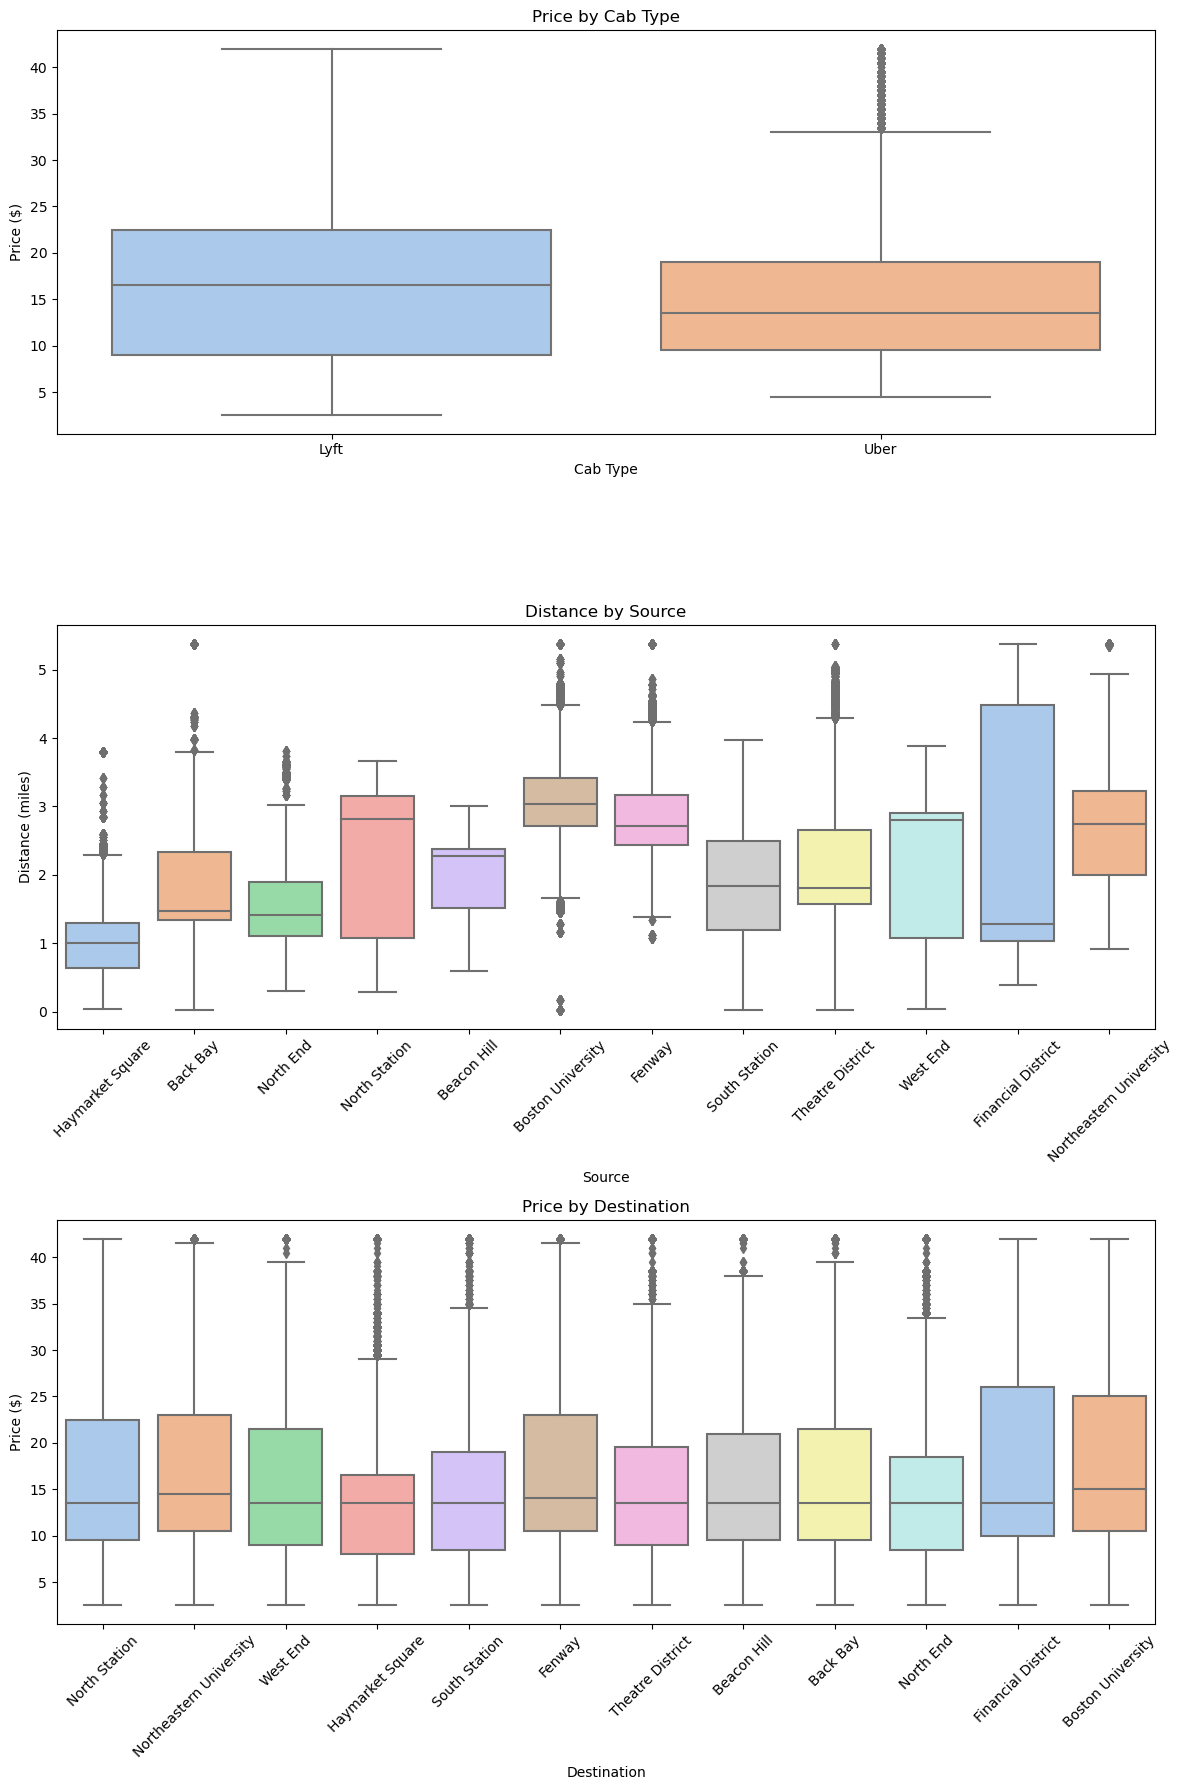

In [12]:
#2.2)Now, we want to find out the relationship between Continuous and Categorical variables.

# Set up the plotting area
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Box plot for cab_type vs. price
sns.boxplot(x='cab_type', y='price', data=data, ax=axes[0], palette='pastel')
axes[0].set_title('Price by Cab Type')
axes[0].set_xlabel('Cab Type')
axes[0].set_ylabel('Price ($)')

# Box plot for source vs. distance
sns.boxplot(x='source', y='distance', data=data, ax=axes[1], palette='pastel')
axes[1].set_title('Distance by Source')
axes[1].set_xlabel('Source')
axes[1].set_ylabel('Distance (miles)')
axes[1].tick_params(axis='x', rotation=45)

# Box plot for destination vs. price
sns.boxplot(x='destination', y='price', data=data, ax=axes[2], palette='pastel')
axes[2].set_title('Price by Destination')
axes[2].set_xlabel('Destination')
axes[2].set_ylabel('Price ($)')
axes[2].tick_params(axis='x', rotation=45)

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
#We got the following Inference from the Box-plots of selected continuous vs categorical variables

#1)Price by Cab Type: It appears that the median price of Lyft appears to be higher than Uber.
#However, the distribution for Lyft seems to have a wider range, indicating some rides with higher prices compared to Uber.

#2)Distance by Source: The median distances for rides originating from different sources appear to be relatively similar. 
#However, there are variations in the interquartile ranges and outliers for each source.

#3)Price by Destination: The median prices for rides destined for different locations also seem relatively consistent, 
#with slight variations in the distribution of prices for each destination.

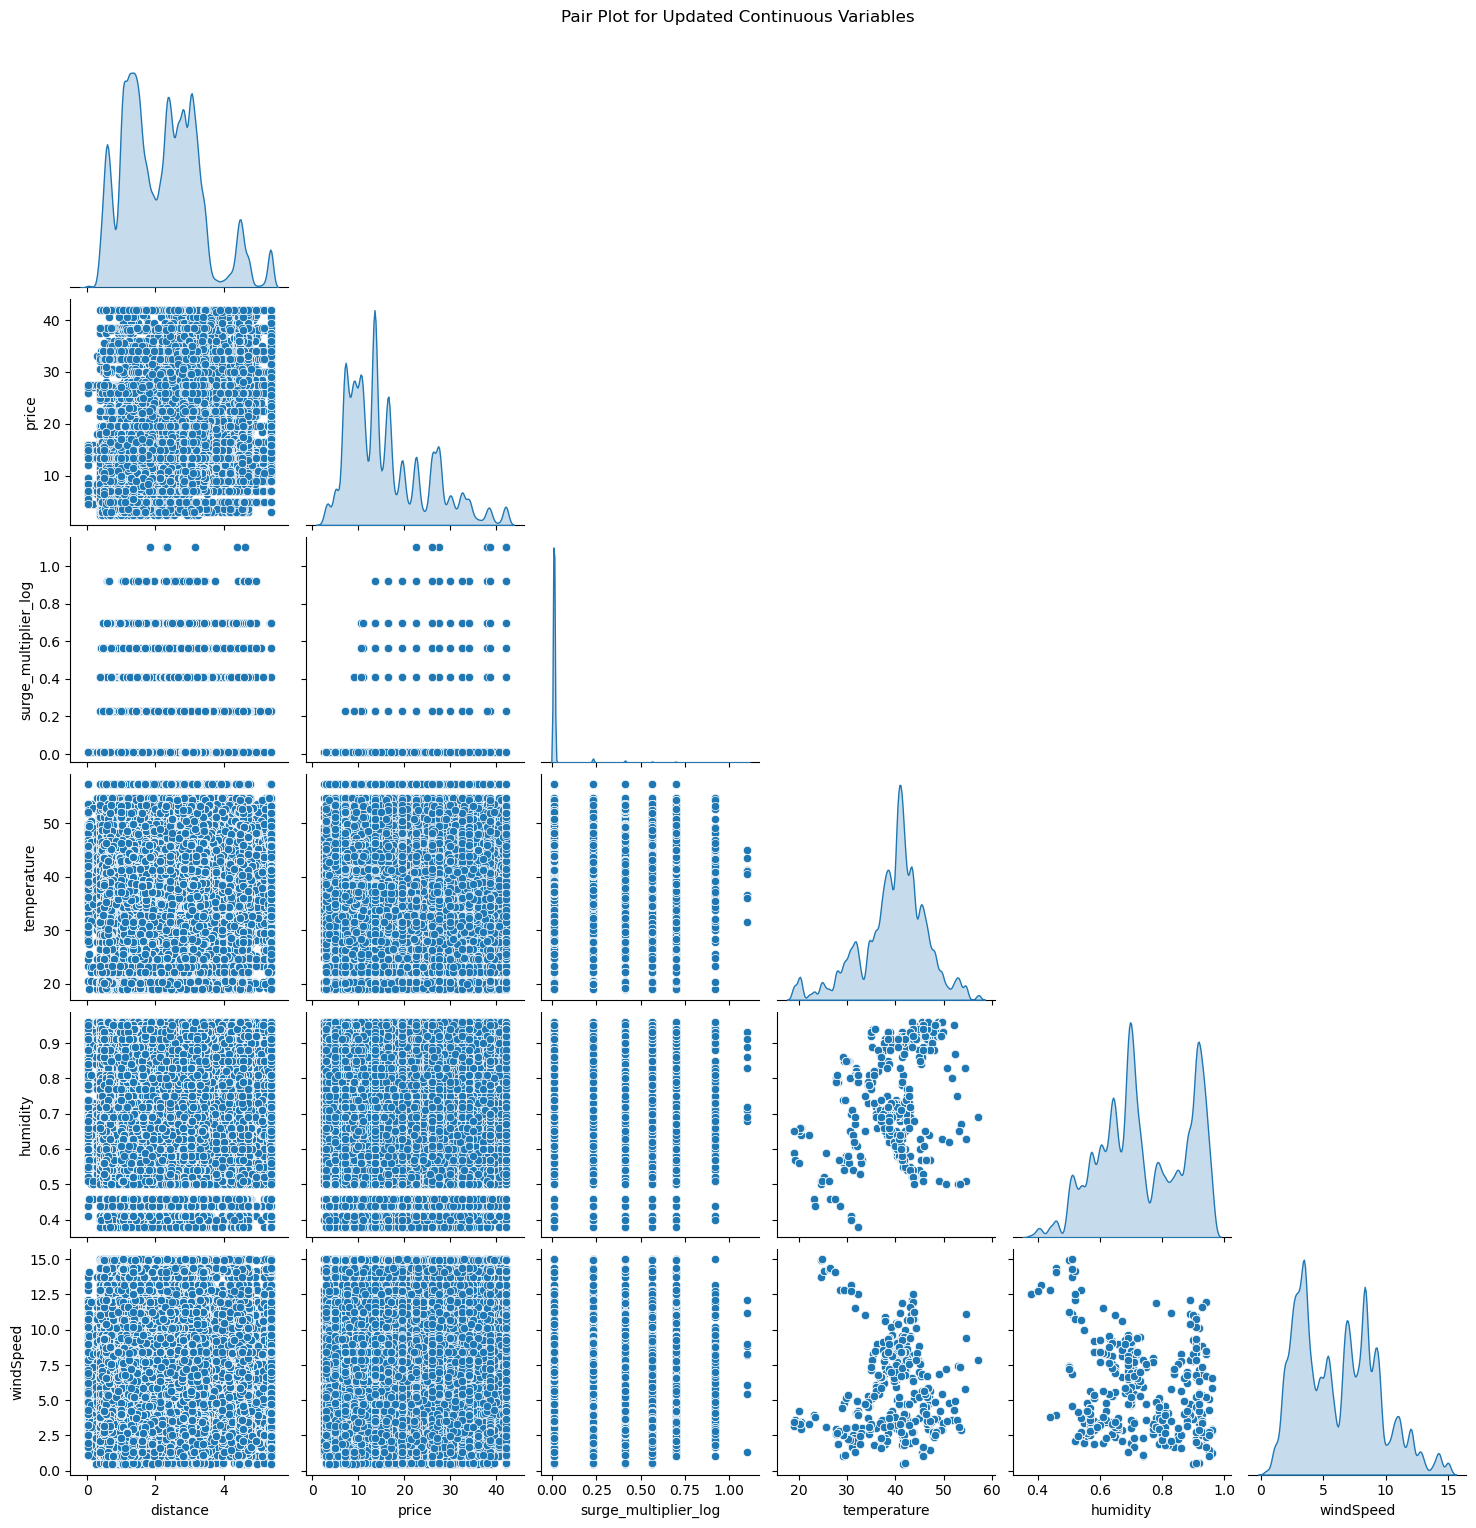

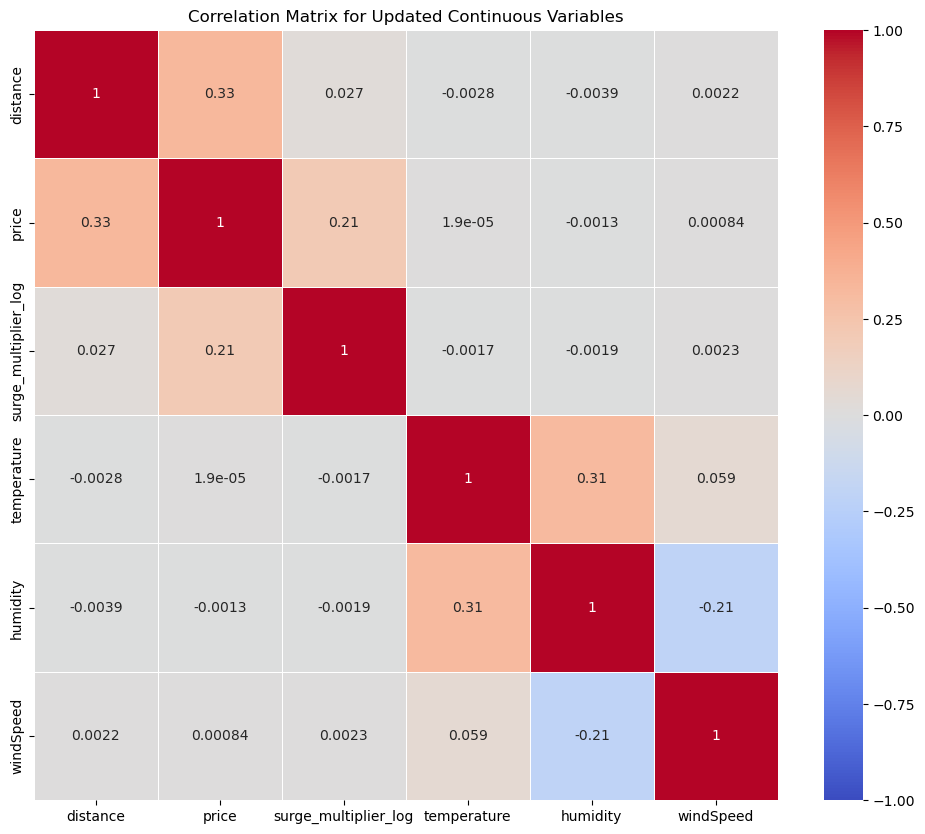

In [13]:
#3)MULTI-VARIATE ANALYSIS : Multivariate analysis investigates the relationships among three or more variables simultaneously.

#We used pair plot and correlation matrix to examine the relationships between the continuous variables price, 
#distance, temperature,surge multiplier log, WindSpeed and humidity.

# Continuous variables for the updated analysis (including surge_multiplier_log)
updated_continuous_cols = ['distance', 'price', 'surge_multiplier_log', 'temperature', 'humidity', 'windSpeed']

# Pair plot for the updated continuous variables
sns.pairplot(data[updated_continuous_cols], corner=True, diag_kind="kde")
plt.suptitle('Pair Plot for Updated Continuous Variables', y=1.02)
plt.show()

# Correlation matrix for the updated variables
updated_correlation_matrix = data[updated_continuous_cols].corr()

# Heatmap of the correlation matrix for the updated variables
plt.figure(figsize=(12, 10))
sns.heatmap(updated_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix for Updated Continuous Variables')
plt.show()

In [ ]:
#Inference from the PairPlot & Correlation Matrix

#Pair plot:
#This plot provides scatter plots for each pair of the updated continuous variables. The diagonal displays the kernel density estimation for each variable.
#A notable positive correlation is observed between price and distance.
#The variable surge_multiplier_log seems to have an effect on the price, though it appears more subtle than the direct surge multiplier.


#Correlation Matrix:
#The heatmap represents the correlation coefficients between pairs of the updated continuous variables.
#price and distance maintain a strong positive correlation of approximately 0.33.
#price and surge_multiplier_log have a positive correlation of approximately 0.21.
#Most other correlations are relatively low, indicating weaker linear relationships between the respective pairs of variables.

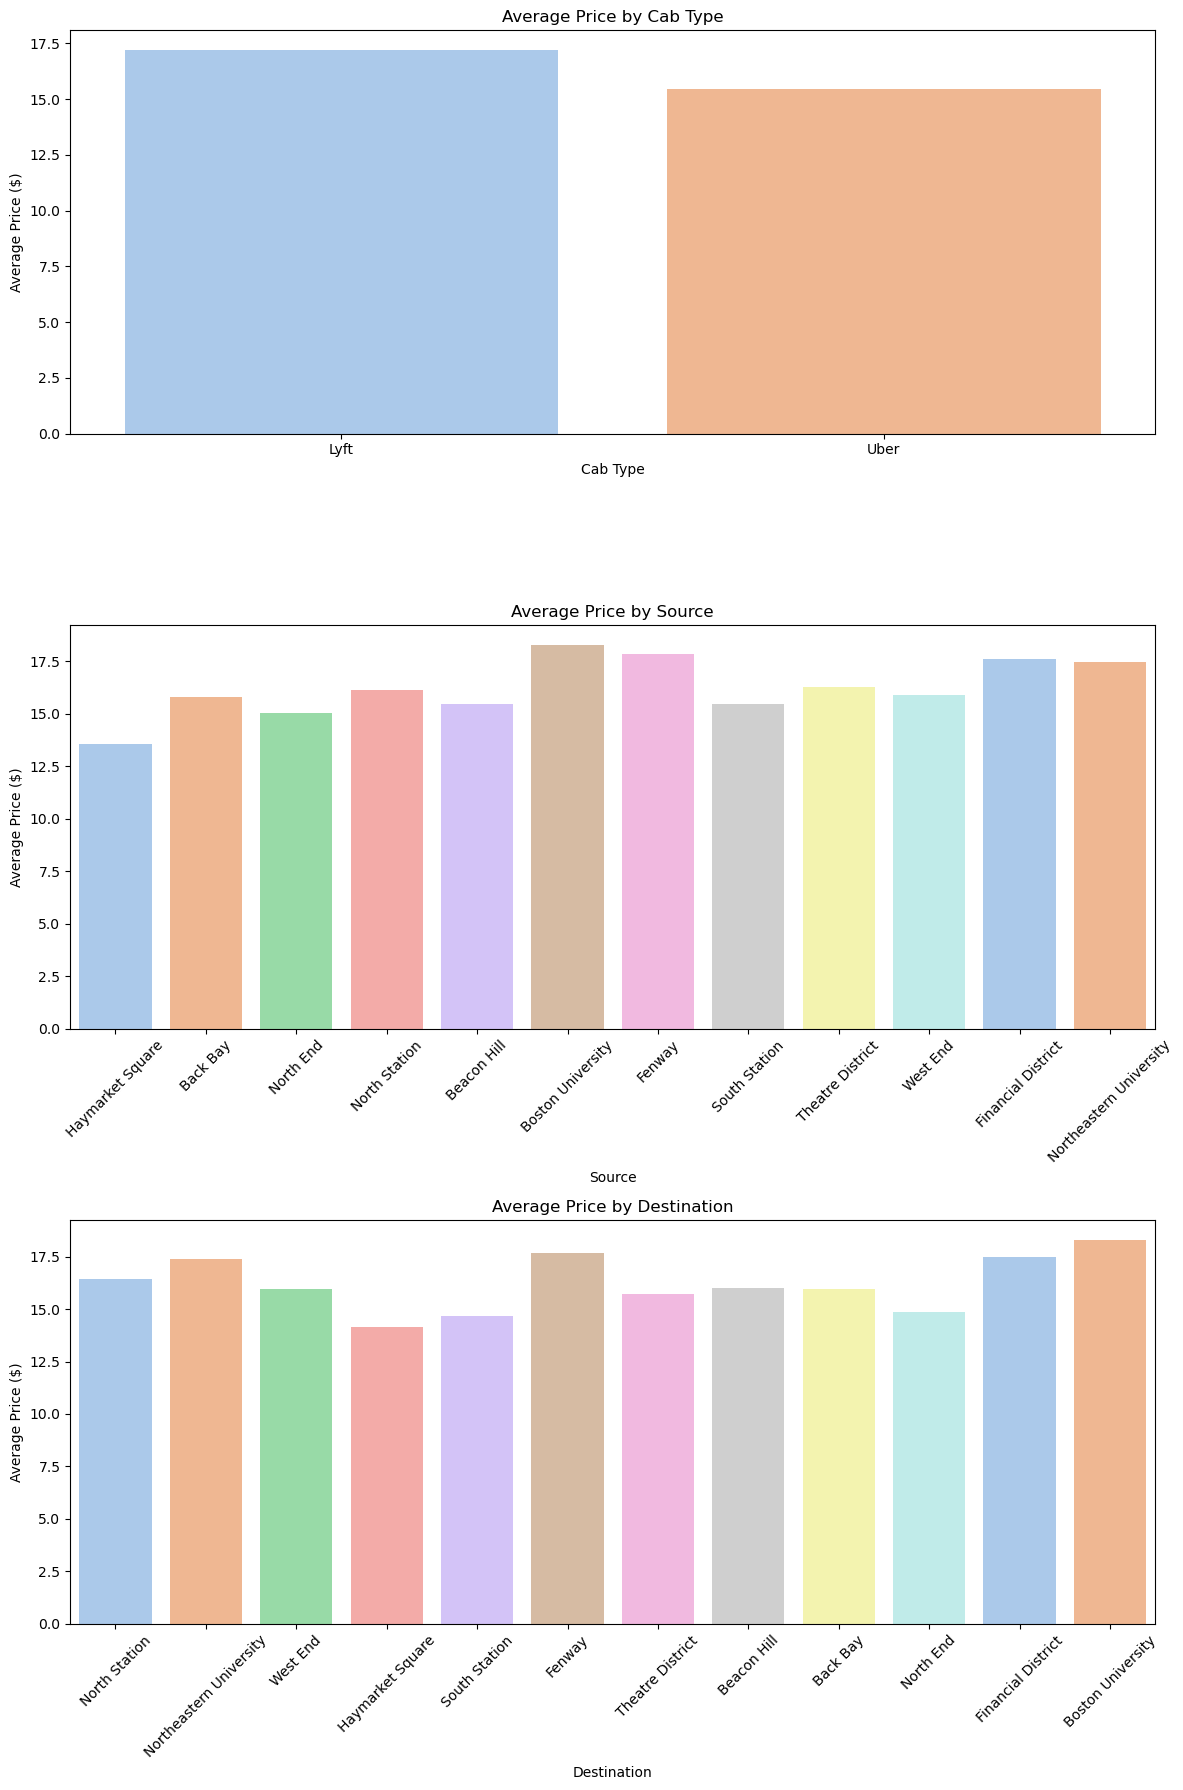

In [18]:
#3.2)Analysis for Categorical variables and their relationship with continuous variable 'Price'.

# Set up the plotting area
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Updated grouped bar plot for cab_type vs. price
sns.barplot(x='cab_type', y='price', data=data, ax=axes[0], palette='pastel', errorbar=None)
axes[0].set_title('Average Price by Cab Type')
axes[0].set_xlabel('Cab Type')
axes[0].set_ylabel('Average Price ($)')

# Updated grouped bar plot for source vs. price
sns.barplot(x='source', y='price', data=data, ax=axes[1], palette='pastel', errorbar=None)
axes[1].set_title('Average Price by Source')
axes[1].set_xlabel('Source')
axes[1].set_ylabel('Average Price ($)')
axes[1].tick_params(axis='x', rotation=45)

# Updated grouped bar plot for destination vs. price
sns.barplot(x='destination', y='price', data=data, ax=axes[2], palette='pastel', errorbar=None)
axes[2].set_title('Average Price by Destination')
axes[2].set_xlabel('Destination')
axes[2].set_ylabel('Average Price ($)')
axes[2].tick_params(axis='x', rotation=45)

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
#Inference from the above grouped bar plots showcasing the relationship between the categorical variables and the continuous variable 'price'

#1)Average Price by Cab Type: The average price of Lyft is higher than Uber.
#2)Average Price by Source: The average prices for rides originating from different sources are fairly consistent, with minor variations among them.
#3)Average Price by Destination: The average prices for rides destined for different locations are also relatively consistent, with some variations among the destinations.